In [65]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for Corn and Wheat futures
corn_ticker = 'ZC=F'
wheat_ticker = 'ZW=F'

# Define the time period for data collection
start_date = '2018-01-01'
end_date = '2020-01-01'

# Download historical data for Corn and Wheat
corn_data = yf.download(corn_ticker, start=start_date, end=end_date)
wheat_data = yf.download(wheat_ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


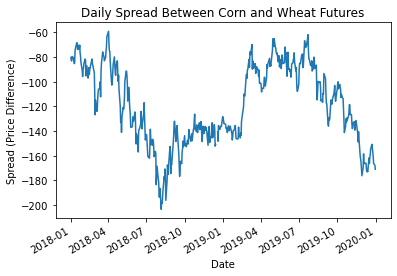

count    501.000000
mean    -118.784431
std       32.009763
min     -203.500000
25%     -141.500000
50%     -118.750000
75%      -89.250000
max      -59.000000
Name: Close, dtype: float64


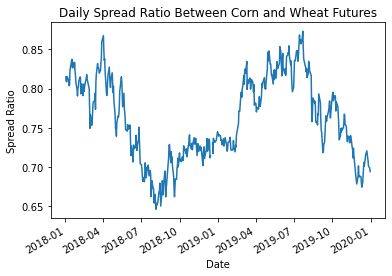

count    501.000000
mean       0.762014
std        0.053138
min        0.645779
25%        0.721949
50%        0.758356
75%        0.808212
max        0.873268
Name: Close, dtype: float64


In [66]:
# Calculate the daily spread between Corn and Wheat closing prices
spread = corn_data['Close'] - wheat_data['Close']

# Plot the spread over time
spread.plot(title='Daily Spread Between Corn and Wheat Futures')
plt.xlabel('Date')
plt.ylabel('Spread (Price Difference)')
plt.show()

# Basic statistics of the spread
print(spread.describe())

# You might also want to analyze the spread as a ratio
spread_ratio = corn_data['Close'] / wheat_data['Close']
spread_ratio.plot(title='Daily Spread Ratio Between Corn and Wheat Futures')
plt.xlabel('Date')
plt.ylabel('Spread Ratio')
plt.show()

# Basic statistics of the spread ratio
print(spread_ratio.describe())


In [77]:
entry_threshold = spread.mean() +  spread.std()
exit_threshold = spread.mean() - 0.5*spread.std()

print("Entry Threshold:", entry_threshold)
print("Exit Threshold:", exit_threshold)

# Initialize columns for trade signals
corn_data['Trade_Signal'] = 0
wheat_data['Trade_Signal'] = 0

# Flag to track the trade status
in_trade = False

# Loop through the data to generate trade signals
for date, value in spread.items():
    if value > entry_threshold and not in_trade:
        corn_data.at[date, 'Trade_Signal'] = -1
        wheat_data.at[date, 'Trade_Signal'] = 1
        in_trade = True
        print(f"Entry Signal on {date}, Spread: {value}")
    elif value < exit_threshold and in_trade:
        corn_data.at[date, 'Trade_Signal'] = 0
        wheat_data.at[date, 'Trade_Signal'] = 0
        in_trade = False
        print(f"Exit Signal on {date}, Spread: {value}")

# Example: View trade signals
print(corn_data[['Close', 'Trade_Signal']].tail())
print(wheat_data[['Close', 'Trade_Signal']].tail())

Entry Threshold: -86.77466798449662
Exit Threshold: -134.7893127143385
Entry Signal on 2018-01-02 00:00:00, Spread: -80.25
Exit Signal on 2018-05-03 00:00:00, Spread: -141.0
Entry Signal on 2019-03-04 00:00:00, Spread: -81.75
Exit Signal on 2019-09-10 00:00:00, Spread: -136.0
             Close  Trade_Signal
Date                            
2019-12-24  387.50             0
2019-12-26  388.50             0
2019-12-27  390.00             0
2019-12-30  388.25             0
2019-12-31  387.75             0
             Close  Trade_Signal
Date                            
2019-12-24  541.00             0
2019-12-26  549.00             0
2019-12-27  556.25             0
2019-12-30  556.00             0
2019-12-31  558.75             0


Spread Trading Strategy - Final Portfolio Value: 128316.03229527104
Total Return: 28316.03229527104
Return Percentage: 28.316032295271043%

Corn Buy and Hold - Final Value: 109766.45435244161
Wheat Buy and Hold - Final Value: 128892.73356401385



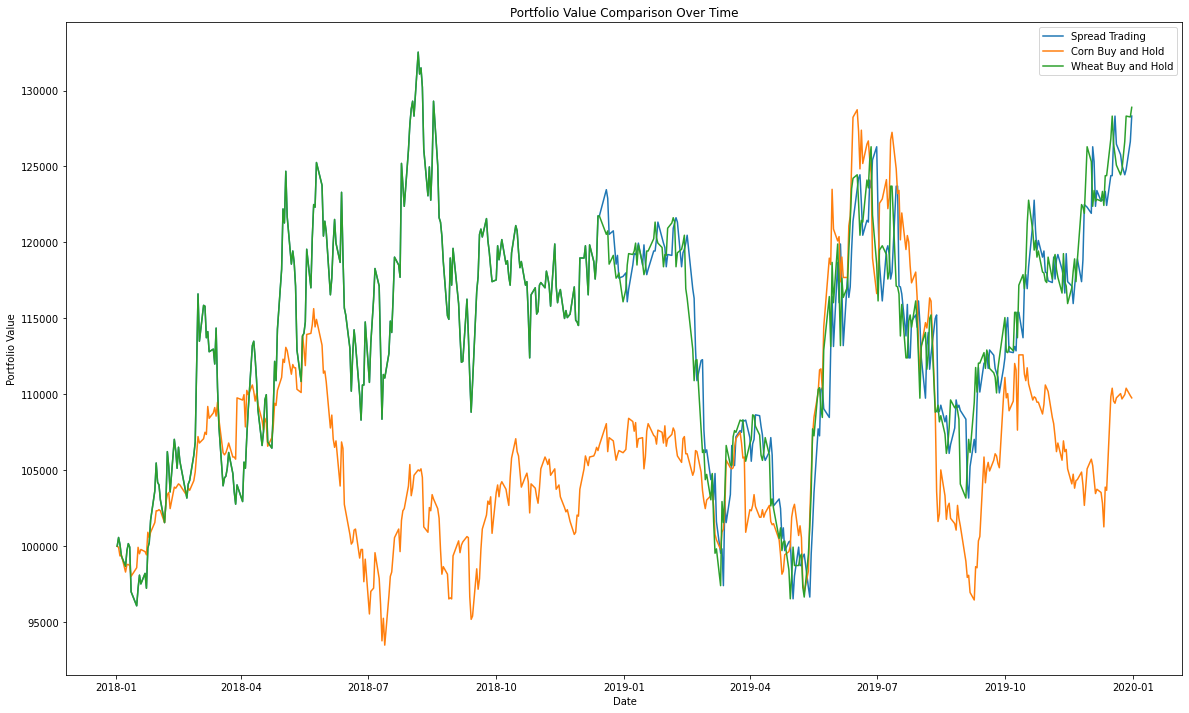

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming corn_data and wheat_data are already loaded and contain 'Trade_Signal' and 'Close'
initial_capital = 100000  # Starting capital

# Calculate Buy and Hold Strategy Values for Corn and Wheat
corn_data['Buy_Hold_Value'] = initial_capital * corn_data['Close'] / corn_data['Close'].iloc[0]
wheat_data['Buy_Hold_Value'] = initial_capital * wheat_data['Close'] / wheat_data['Close'].iloc[0]

# Initialize variables for Spread Trading Strategy
corn_position = wheat_position = 0
capital = initial_capital
spread_trading_value = []  # To track the value of the spread strategy portfolio

# Simulate the trading based on the generated signals
for i in range(len(corn_data)):
    corn_signal = corn_data.iloc[i]['Trade_Signal']
    wheat_signal = wheat_data.iloc[i]['Trade_Signal']
    corn_price = corn_data.iloc[i]['Close']
    wheat_price = wheat_data.iloc[i]['Close']

    # Execute trades for Corn based on signals
    if corn_signal == 1:  # Buy Corn
        corn_position += capital / corn_price
        capital = 0
    elif corn_signal == -1:  # Sell Corn
        capital += corn_position * corn_price
        corn_position = 0

    # Execute trades for Wheat based on signals
    if wheat_signal == 1:  # Buy Wheat
        wheat_position += capital / wheat_price
        capital = 0
    elif wheat_signal == -1:  # Sell Wheat
        capital += wheat_position * wheat_price
        wheat_position = 0

    # Calculate the current portfolio value for the spread trading strategy
    current_spread_value = capital + corn_position * corn_price + wheat_position * wheat_price
    spread_trading_value.append(current_spread_value)

# Create a DataFrame for comparison
portfolio_df = pd.DataFrame({
    'Spread_Trading_Value': spread_trading_value,
    'Corn_Buy_Hold_Value': corn_data['Buy_Hold_Value'],
    'Wheat_Buy_Hold_Value': wheat_data['Buy_Hold_Value']
}, index=corn_data.index)

# Calculate final values and performance metrics for Spread Trading
final_spread_value = portfolio_df['Spread_Trading_Value'].iloc[-1]
spread_total_return = final_spread_value - initial_capital
spread_return_percentage = (spread_total_return / initial_capital) * 100

print(f"Spread Trading Strategy - Final Portfolio Value: {final_spread_value}")
print(f"Total Return: {spread_total_return}")
print(f"Return Percentage: {spread_return_percentage}%\n")

# Calculate final values for Buy and Hold Strategies
final_corn_value = portfolio_df['Corn_Buy_Hold_Value'].iloc[-1]
final_wheat_value = portfolio_df['Wheat_Buy_Hold_Value'].iloc[-1]

print(f"Corn Buy and Hold - Final Value: {final_corn_value}")
print(f"Wheat Buy and Hold - Final Value: {final_wheat_value}\n")

# Plotting the portfolio values over time
plt.figure(figsize=(20, 12))

plt.plot(portfolio_df)
plt.title('Portfolio Value Comparison Over Time')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.legend(['Spread Trading', 'Corn Buy and Hold', 'Wheat Buy and Hold'])
plt.show()
